# Machine Learning
## - Stochastic Gradient Descent
## - Support Vector Machine
## - Random Forest
###### Por: Ricardo Reis

###### Case - Employee Turnover

#### Carrega Pacotes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

# Para padronização dos dados
from sklearn.preprocessing import StandardScaler

# Para separação em amostra de treino e teste
from sklearn.model_selection import train_test_split

# Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

# Modelos
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Métrica de erro
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Leitura de Dados

In [0]:
df = pd.read_csv('/content/employee_turnover.csv', sep = ',', index_col=0 )

In [3]:
df.head(5)

,x1_department,x2_salary,x3_timecompany,x4_promotion5yr,x5_workaccident,x6_workhours,x7_nprojects,x8_lasteval,x9_satisflevel,y_empleft
1,sales,low,3,0,0,157,2,53,38,1
2,sales,medium,6,0,0,262,5,86,80,1
3,sales,medium,4,0,0,272,7,88,11,1
4,sales,low,5,0,0,223,5,87,72,1
5,sales,low,3,0,0,159,2,52,37,1


#### Análise Exploratória

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       14999 non-null  int64 
 1   x1_department    14999 non-null  object
 2   x2_salary        14999 non-null  object
 3   x3_timecompany   14999 non-null  int64 
 4   x4_promotion5yr  14999 non-null  int64 
 5   x5_workaccident  14999 non-null  int64 
 6   x6_workhours     14999 non-null  int64 
 7   x7_nprojects     14999 non-null  int64 
 8   x8_lasteval      14999 non-null  int64 
 9   x9_satisflevel   14999 non-null  int64 
 10  y_empleft        14999 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 1.3+ MB


In [0]:
df.isna().sum()

x1_department      0
x2_salary          0
x3_timecompany     0
x4_promotion5yr    0
x5_workaccident    0
x6_workhours       0
x7_nprojects       0
x8_lasteval        0
x9_satisflevel     0
y_empleft          0
dtype: int64

In [0]:
df['x1_department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
other           787
accounting      767
hr              739
management      630
Name: x1_department, dtype: int64

In [0]:
df['x2_salary'].value_counts()

low       7316
medium    6446
high      1237
Name: x2_salary, dtype: int64

In [0]:
#Checa proporção da variável resposta
df['y_empleft'].value_counts(normalize=True) * 100

0    76.191746
1    23.808254
Name: y_empleft, dtype: float64

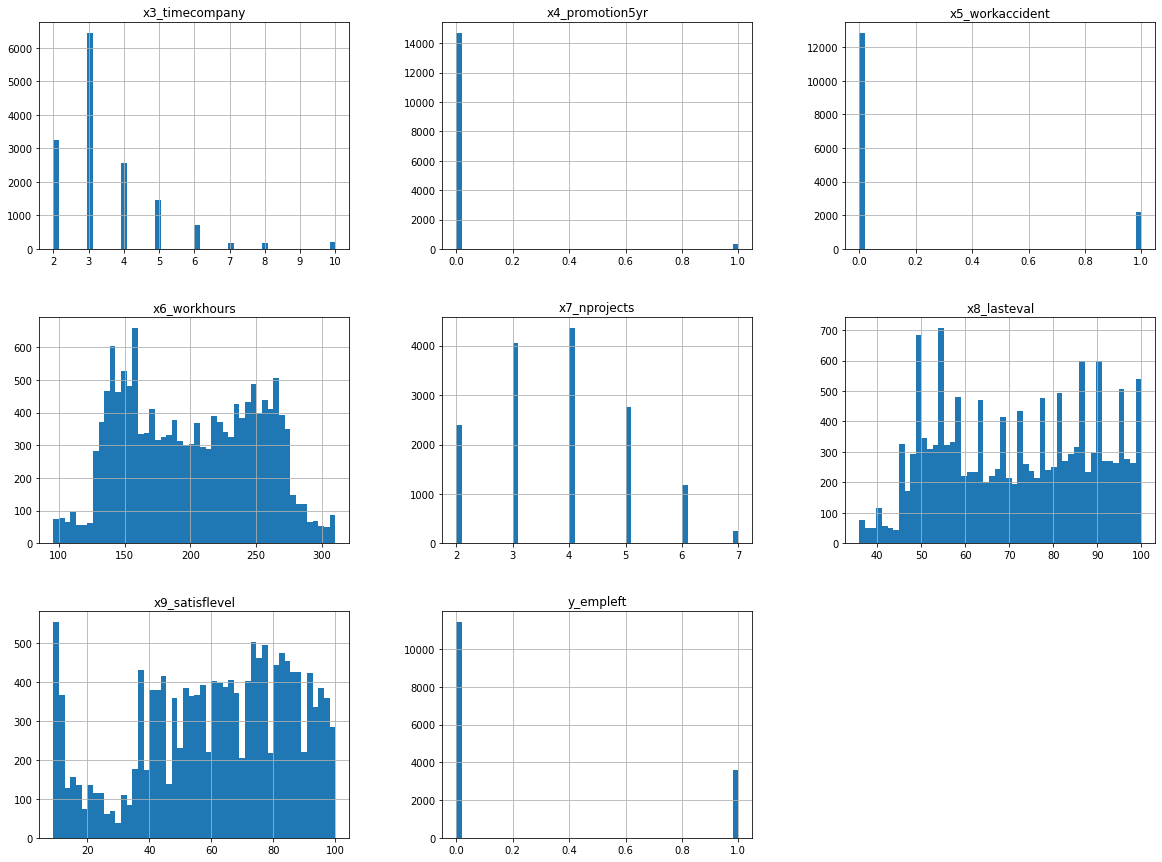

In [0]:
df.hist(bins=50, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcf683fda0>,
      dtype=object)

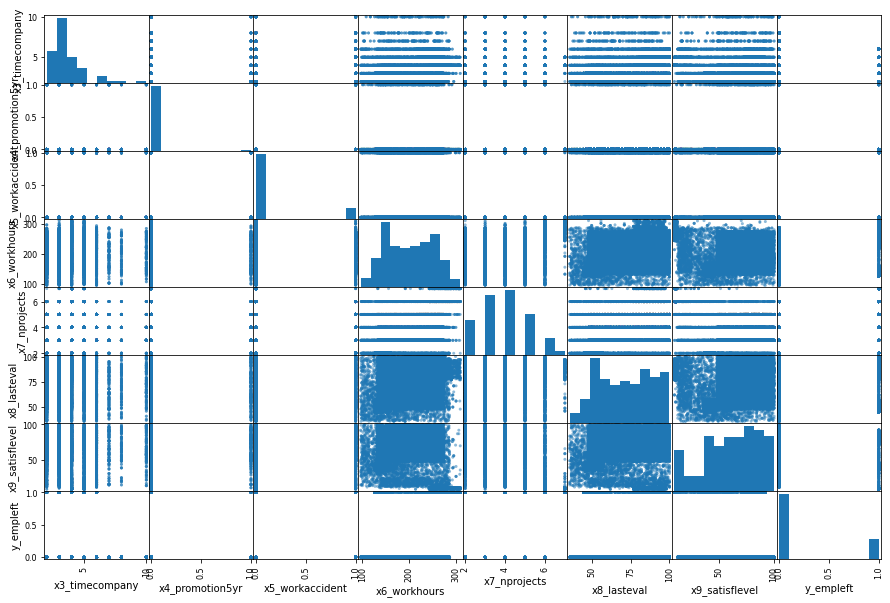

In [0]:
 pd.plotting.scatter_matrix(df, figsize=(15, 10))

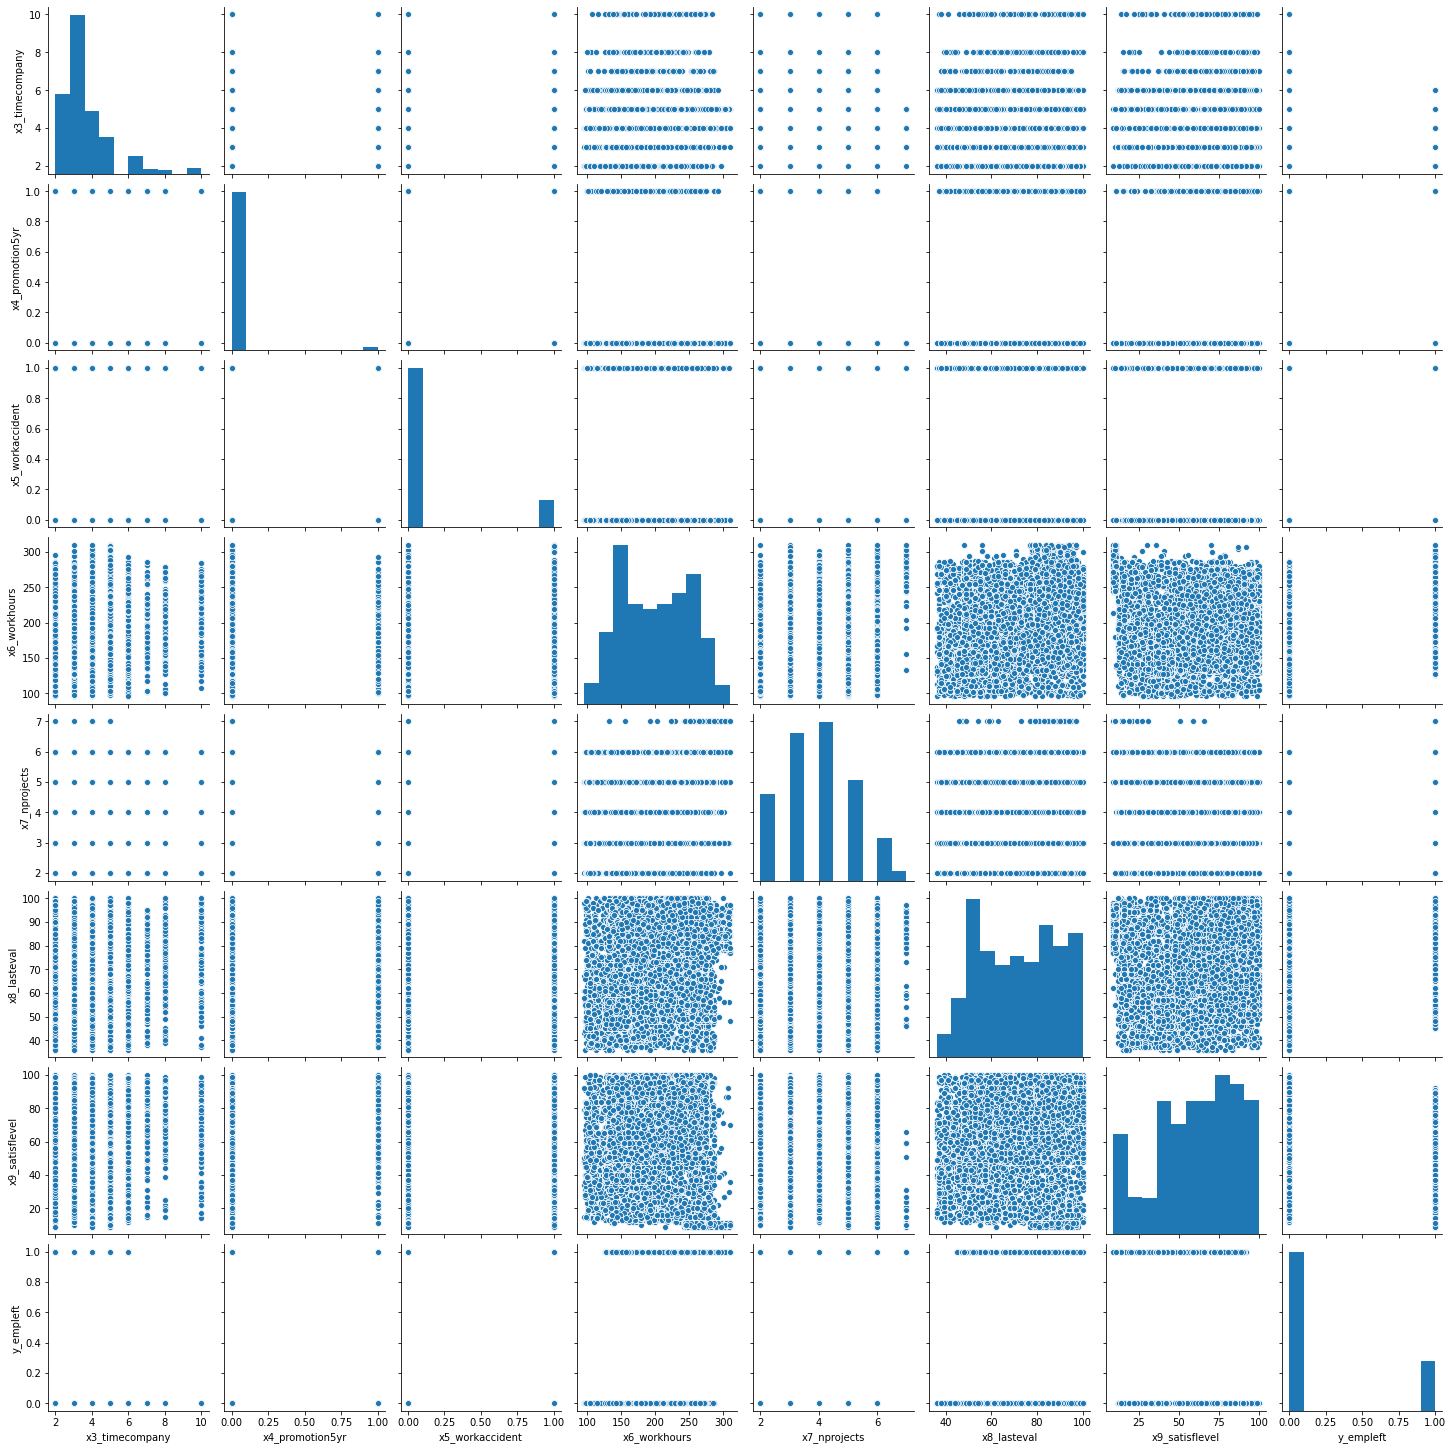

In [0]:
sns.pairplot(df)

In [0]:
corr_matrix = df.corr()
corr_matrix["y_empleft"].sort_values(ascending=False)

y_empleft          1.000000
x3_timecompany     0.144822
x6_workhours       0.071287
x7_nprojects       0.023787
x8_lasteval        0.006567
x4_promotion5yr   -0.061788
x5_workaccident   -0.154622
x9_satisflevel    -0.388375
Name: y_empleft, dtype: float64

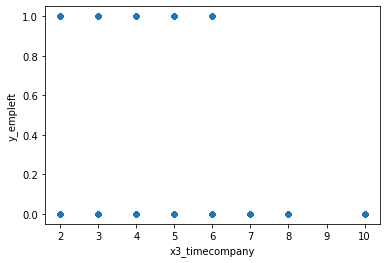

In [0]:
df.plot(kind='scatter', x = 'x3_timecompany', y = 'y_empleft')

#### Data Prep

In [0]:
#Separa Features da Variável Resposta
features = df.loc[:,['x3_timecompany',	'x6_workhours',	'x7_nprojects',	'x8_lasteval', 'x4_promotion5yr',	'x5_workaccident',	'x9_satisflevel']]
labels = df.loc[:,['y_empleft']]
         

In [5]:
# Cria novo DataFrame para as colunas categoricas
dep_dummies = pd.get_dummies(df['x1_department'])
sal_dummies = pd.get_dummies(df['x2_salary'])

dep_dummies.head(60)

,IT,accounting,hr,management,marketing,other,product_mng,sales,support,technical
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,1,0,0
10,0,0,0,0,0,0,0,1,0,0


In [6]:
features = pd.concat([features, dep_dummies, sal_dummies], axis = 1)
features

,x3_timecompany,x6_workhours,x7_nprojects,x8_lasteval,x4_promotion5yr,x5_workaccident,x9_satisflevel,IT,accounting,hr,management,marketing,other,product_mng,sales,support,technical,high,low,medium
1,3,157,2,53,0,0,38,0,0,0,0,0,0,0,1,0,0,0,1,0
2,6,262,5,86,0,0,80,0,0,0,0,0,0,0,1,0,0,0,0,1
3,4,272,7,88,0,0,11,0,0,0,0,0,0,0,1,0,0,0,0,1
4,5,223,5,87,0,0,72,0,0,0,0,0,0,0,1,0,0,0,1,0
5,3,159,2,52,0,0,37,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3,151,2,57,0,0,40,0,0,0,0,0,0,0,0,1,0,0,1,0
14996,3,160,2,48,0,0,37,0,0,0,0,0,0,0,0,1,0,0,1,0
14997,3,143,2,53,0,0,37,0,0,0,0,0,0,0,0,1,0,0,1,0
14998,4,280,6,96,0,0,11,0,0,0,0,0,0,0,0,1,0,0,1,0


In [7]:
sc = StandardScaler()
features2 = sc.fit_transform(features)
features2

array([[-0.34123516, -0.88203988, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [ 1.71343614,  1.22042276,  0.97111292, ..., -0.29980859,
        -0.97582386,  1.15189816],
       [ 0.34365527,  1.4206573 ,  2.59376348, ..., -0.29980859,
        -0.97582386,  1.15189816],
       ...,
       [-0.34123516, -1.16236823, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [ 0.34365527,  1.58084493,  1.7824382 , ..., -0.29980859,
         1.02477511, -0.8681323 ],
       [-0.34123516, -0.86201642, -1.46286291, ..., -0.29980859,
         1.02477511, -0.8681323 ]])

In [0]:
#Cria Dataframes de Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(features2, labels, test_size = 0.2, shuffle=True, random_state = 12345)

### Treinando o Modelo

#### Stochastic Gradient Descent


##### Hold-Out

In [0]:
modelo1 = SGDClassifier(random_state=42)
modelo1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
y_train_pred1 = modelo1.predict(X_train)

In [0]:
confusion_matrix(y_train, y_train_pred1)

array([[8039, 1099],
       [1259, 1602]])

In [0]:
precision_score(y_train, y_train_pred1)

0.5931136616068123

In [0]:
recall_score(y_train, y_train_pred1)

0.5599440754980776

In [0]:
f1_score(y_train, y_train_pred1)

0.576051779935275

In [0]:
print(classification_report(y_train, y_train_pred1, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      9138
           1       0.59      0.56      0.58      2861

    accuracy                           0.80     11999
   macro avg       0.73      0.72      0.72     11999
weighted avg       0.80      0.80      0.80     11999



##### K-fold

In [0]:
modelo2 = SGDClassifier(random_state=42)
y_train_pred2 = cross_val_predict(modelo2, X_train, y_train, cv=3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
confusion_matrix(y_train, y_train_pred2)

array([[8406,  732],
       [1767, 1094]])

In [0]:
print(classification_report(y_train, y_train_pred2, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      9138
           1       0.60      0.38      0.47      2861

    accuracy                           0.79     11999
   macro avg       0.71      0.65      0.67     11999
weighted avg       0.77      0.79      0.77     11999



##### Grid Search

In [0]:
params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(random_state=42)
gs = GridSearchCV(model, param_grid=params)
gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=None,
                                     penalty='l2', power_t=0.5, random_state=42,
                                     shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['hinge', 'log', 'squared_hinge',
                                  'modified_huber'],
                         '

In [0]:
gs.best_params_

{'alpha': 0.1, 'loss': 'hinge', 'penalty': 'none'}

In [0]:
y_train_pred3 = gs.best_estimator_.predict(X_train)

In [0]:
confusion_matrix(y_train, y_train_pred3)

array([[8382,  756],
       [1434, 1427]])

In [0]:
print(classification_report(y_train, y_train_pred3, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      9138
           1       0.65      0.50      0.57      2861

    accuracy                           0.82     11999
   macro avg       0.75      0.71      0.73     11999
weighted avg       0.81      0.82      0.81     11999



#### SVM com Grid Search

In [15]:
params = {
    "gamma" : [0.0001, 0.001, 0.01, 0.1],
    "C" : [1, 10, 100, 1000],
}

model_SVM = SVC(kernel="rbf")
model_SVM_gs = GridSearchCV(model_SVM, param_grid=params, verbose=False)
model_SVM_gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [0]:
model_SVM_gs.best_estimator_

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
model_SVM_gs.best_params_

{'C': 100, 'gamma': 0.1}

In [0]:
y_train_pred4 = model_SVM_gs.best_estimator_.predict(X_train)

In [19]:
confusion_matrix(y_train, y_train_pred4)

array([[9090,   48],
       [  78, 2783]])

In [21]:
print(classification_report(y_train, y_train_pred4, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9138
           1       0.98      0.97      0.98      2861

    accuracy                           0.99     11999
   macro avg       0.99      0.98      0.99     11999
weighted avg       0.99      0.99      0.99     11999



#### Random Forest com Grid Search

In [9]:
params = {
    "n_estimators" : [200, 500, 800, 1000],
    "max_leaf_nodes" : [8, 16, 24, 32],
}

model_RF = RandomForestClassifier(n_jobs=-1)
model_RF_gs = GridSearchCV(model_RF, param_grid=params, verbose=False)
model_RF_gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              rand

In [10]:
model_RF_gs.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=32, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [11]:
model_RF_gs.best_params_

{'max_leaf_nodes': 32, 'n_estimators': 1000}

In [29]:
sorted(zip( model_RF_gs.best_estimator_.feature_importances_, features.columns), reverse=True)

[(0.33532976227343114, 'x9_satisflevel'),
 (0.20915851057235868, 'x7_nprojects'),
 (0.18223519027618834, 'x3_timecompany'),
 (0.13457753757444327, 'x6_workhours'),
 (0.10444243889747704, 'x8_lasteval'),
 (0.011606635262690066, 'x5_workaccident'),
 (0.008329395088147194, 'low'),
 (0.00659567335658443, 'high'),
 (0.0023451070223136994, 'medium'),
 (0.0012672193441684789, 'x4_promotion5yr'),
 (0.0009242182105908721, 'other'),
 (0.0007624175409654174, 'management'),
 (0.0005934710200884816, 'technical'),
 (0.00043320994267673175, 'sales'),
 (0.0003196508670495999, 'support'),
 (0.0003066982651557297, 'hr'),
 (0.0002632768690858625, 'product_mng'),
 (0.00020960276802581672, 'accounting'),
 (0.00020306252433518142, 'IT'),
 (9.692232422406278e-05, 'marketing')]

In [0]:
y_train_pred5 = model_RF_gs.best_estimator_.predict(X_train)

In [13]:
confusion_matrix(y_train, y_train_pred5)

array([[9108,   30],
       [ 292, 2569]])

In [14]:
print(classification_report(y_train, y_train_pred5, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9138
           1       0.99      0.90      0.94      2861

    accuracy                           0.97     11999
   macro avg       0.98      0.95      0.96     11999
weighted avg       0.97      0.97      0.97     11999



### Teste

In [0]:
y_test_pred = model_SVM_gs.best_estimator_.predict(X_test)

In [0]:
confusion_matrix(y_test, y_test_pred)

array([[2238,   52],
       [  43,  667]])

In [0]:
print(classification_report(y_test, y_test_pred, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2290
           1       0.93      0.94      0.93       710

    accuracy                           0.97      3000
   macro avg       0.95      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



In [0]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

In [0]:
auc = auc(fpr, tpr)

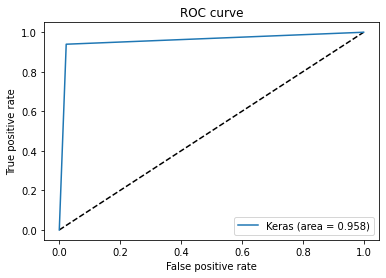

In [0]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()